### Indice de Pobreza no Brasil

Estudo baseado no levantamento de pessoas e famílias no Brasil em situação de vulnerabilidade social usando como fonte de dados o Cadastro Único Brasileiro e o Auxílio Brasil. 

Dados fornecidos aqui nesta plataforma e retirados do: https://economia-popular.github.io

#### Há dois Datasets presentes na base para estudo:

1 - indices_pobreza_consolidado --> Que apresenta o consolidado da evolução dos dados por mês

2 - indices_pobreza_consolidado_anual --> Que apresenta o consolidado da evolução dos dados por ano

Para este exemplo, vou utilizar o anual, visto que tenho um objetivo de realizar uma análise simples dos acontecimentos. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Realizando a criação do DataFrame

df = pd.read_csv('indices_pobreza_consolidado_anual.csv', encoding='utf-8', sep=',')

In [3]:
df.head()

,referencia,periodo,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,...,familias_vulnerabilidade,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade
0,2012,201212,19392882,44684759,64077641,193976530,0.10,0.23,0.33,5311337,...,18472436,14209,87820,102029,8314,60250,68564,143,978,1121
1,2013,201312,19268775,43914616,63183391,201062789,0.10,0.22,0.31,5397222,...,18752056,15781,95602,111383,10718,77092,87810,305,1702,2007
2,2014,201412,18491146,45300249,63791395,202799518,0.09,0.22,0.31,5325302,...,19420635,16711,105747,122458,11986,94670,106656,405,2499,2904
3,2015,201512,14652534,38919660,53572194,204482867,0.07,0.19,0.26,4268713,...,16603991,15970,104672,120642,12770,100889,113659,540,3099,3639
4,2016,201612,12974976,36803455,49778431,206114067,0.06,0.18,0.24,3849178,...,15569480,15723,106059,121782,12370,109495,121865,591,3524,4115


In [4]:
df.columns

Index(['referencia', 'periodo', 'pobreza', 'extrema_pobreza', 'total',
       'populacao_estimada', 'porcentagem_pobreza',
       'porcentagem_extrema_pobreza', 'porcentagem_vulnerabilidade',
       'familias_pobreza', 'familias_extrema_pobreza',
       'familias_vulnerabilidade', 'indigenas_pobreza',
       'indigenas_extrema_pobreza', 'indigenas_vulnerabilidade',
       'quilombolas_pobreza', 'quilombolas_extrema_pobreza',
       'quilombolas_vulnerabilidade', 'ciganos_pobreza',
       'ciganos_extrema_pobreza', 'ciganos_vulnerabilidade'],
      dtype='object')

Observando a base, podemos verificar que temos muitos ítens para explorar, e para não tratar com supercialidade nenhum dos casos, vou centralizar minha análise somente no que compete à macro visualização do dataset.

Para isso, vou criar um novo dataframe só com as informações que eu quero já filtradas e detalhadas.

In [5]:
#limpeza

df_pobreza = df.drop(columns=['periodo',
    'familias_pobreza', 'familias_extrema_pobreza','familias_vulnerabilidade',
    'porcentagem_pobreza','porcentagem_extrema_pobreza', 'porcentagem_vulnerabilidade', 
    'indigenas_pobreza','indigenas_extrema_pobreza', 'indigenas_vulnerabilidade',
    'quilombolas_pobreza', 'quilombolas_extrema_pobreza','quilombolas_vulnerabilidade', 
    'ciganos_pobreza','ciganos_extrema_pobreza', 'ciganos_vulnerabilidade'])

In [6]:
#Apresentando um DataFrame Limpo

df_pobreza

,referencia,pobreza,extrema_pobreza,total,populacao_estimada
0,2012,19392882,44684759,64077641,193976530
1,2013,19268775,43914616,63183391,201062789
2,2014,18491146,45300249,63791395,202799518
3,2015,14652534,38919660,53572194,204482867
4,2016,12974976,36803455,49778431,206114067
5,2017,11481091,38469544,49950635,207660929
6,2018,9679720,37766288,47446008,208494900
7,2019,8977608,39090704,48068312,210147125
8,2020,8482827,39596469,48079296,211755692
9,2021,8901321,42662245,51563566,213317639


In [7]:
df_pobreza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   referencia          11 non-null     int64
 1   pobreza             11 non-null     int64
 2   extrema_pobreza     11 non-null     int64
 3   total               11 non-null     int64
 4   populacao_estimada  11 non-null     int64
dtypes: int64(5)
memory usage: 568.0 bytes


<Figure size 432x288 with 0 Axes>

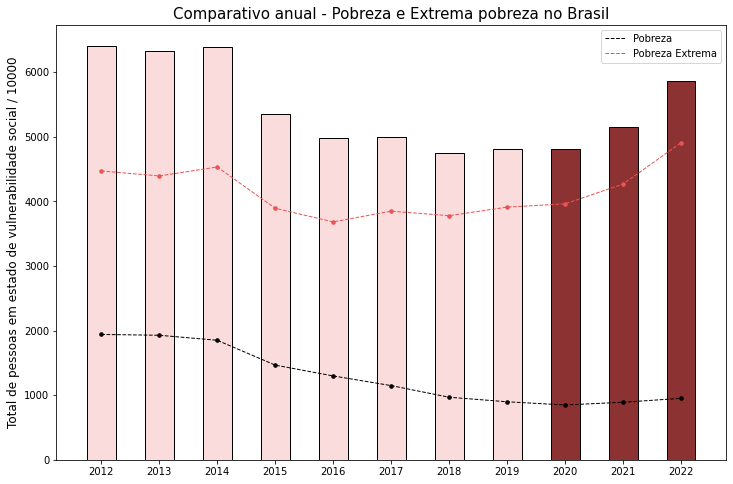

In [8]:
plt.clf()

fig, ax = plt.subplots(figsize=(12, 8))
largura = 0.50

x = df_pobreza['referencia']
y = df_pobreza['total'] /10000
y1 = df_pobreza['pobreza'] / 10000
y2 = df_pobreza['extrema_pobreza'] /10000


cor = ['#8d3232' if ano >= 2020 else '#fbdcdc' for ano in x]

ax.bar(x, y, largura, 
       color=cor,
      edgecolor = 'k',
      linewidth = 1)

ax.plot(x, y1, linestyle = '--', color='k', label='Pobreza', linewidth = 1)
ax.plot(x, y2, linestyle = '--', color='#ec5454', label='Pobreza Extrema', linewidth = 1)

plt.scatter(x, y1, color='k', marker='.', s=50)
plt.scatter(x, y2, color='#ec5454', marker='.', s=50)

ax.set_title('Comparativo anual - Pobreza e Extrema pobreza no Brasil', fontsize=15)
ax.set_ylabel('Total de pessoas em estado de vulnerabilidade social / 10000', fontsize=12)

ax.set_xticks(x)

ax.legend()
plt.show()

Estes últimos 10 anos foram intensos no Brasil. Mas com a intenção de não propor uma análise baseada em qualquer viés político, sinalizei de cor diferente apenas os últimos 3 anos, no que competem há um período durante-pós-pandemia.

No gráfico apresentado, podemos ter alguns mínimos questionamentos sobre o porquê de haver uma discrepância tão grande entre os considerados pobres e os muito pobres. Talvez seja válido aprofundar os estudos num conceito de escala de igualdade social mais elaborado e entender estes motivos. 

Além disso, há um recúo significativo anual (2012-20) na quantidade de brasileiros em classificação de pobreza, mas o caso não se repete com os extremamente pobres, podendo dar uma margem de especulação, para que uma parte destas pessoas que saíram da pobreza tenham chegado à fase de pobreza extrema.


Para poder me aprofundar um pouco mais no contexto, resolvi caclular a variação destes valores por ano. 

In [9]:
# Calculando a variação da probreza por ano

df_pobreza['variacao_pobreza'] = (
    ((df_pobreza['pobreza'] / df_pobreza['pobreza'].shift(1)) -1) * 100
).round(2)

df_pobreza['variacao_extrema_pobreza'] = (
    ((df_pobreza['extrema_pobreza'] / df_pobreza['extrema_pobreza'].shift(1)) -1) * 100
).round(2)

df_pobreza['variacao_total'] = (
    ((df_pobreza['total'] / df_pobreza['total'].shift(1)) -1) * 100
).round(2)

df_pobreza['cres_populacao'] = (
    ((df_pobreza['populacao_estimada'] / df_pobreza['populacao_estimada'].shift(1)) -1) * 100
).round(2)

In [10]:
df_pobreza

,referencia,pobreza,extrema_pobreza,total,populacao_estimada,variacao_pobreza,variacao_extrema_pobreza,variacao_total,cres_populacao
0,2012,19392882,44684759,64077641,193976530,NaN,NaN,NaN,NaN
1,2013,19268775,43914616,63183391,201062789,-0.64,-1.72,-1.40,3.65
2,2014,18491146,45300249,63791395,202799518,-4.04,3.16,0.96,0.86
3,2015,14652534,38919660,53572194,204482867,-20.76,-14.09,-16.02,0.83
4,2016,12974976,36803455,49778431,206114067,-11.45,-5.44,-7.08,0.80
5,2017,11481091,38469544,49950635,207660929,-11.51,4.53,0.35,0.75
6,2018,9679720,37766288,47446008,208494900,-15.69,-1.83,-5.01,0.40
7,2019,8977608,39090704,48068312,210147125,-7.25,3.51,1.31,0.79
8,2020,8482827,39596469,48079296,211755692,-5.51,1.29,0.02,0.77
9,2021,8901321,42662245,51563566,213317639,4.93,7.74,7.25,0.74


Com este quadro, podemos visualizar na coluna "variacao_extrema_pobreza" pelo mesmo período de (2012-20), que há uma tímida variação entre os brasileiros em classificação de vulnerabilidade social extrema. O que pode indicar que parte destes entra na fase da pobreza e volta para a pobreza extrema com o passar dos anos.


Resolvi tranformar alguns valores float em string para poder dar uma melhor visualização nas informações na tabela abaixo.

In [11]:
df_estiloso = df_pobreza

df_estiloso['variacao_pobreza'] = df_estiloso['variacao_pobreza'].apply(lambda x: '{:.2f}%'.format(x))
df_estiloso['variacao_extrema_pobreza'] = df_estiloso['variacao_extrema_pobreza'].apply(lambda x: '{:.2f}%'.format(x))
df_estiloso['variacao_total'] = df_estiloso['variacao_total'].apply(lambda x: '{:.2f}%'.format(x))
df_estiloso['cres_populacao'] = df_estiloso['cres_populacao'].apply(lambda x: '{:.2f}%'.format(x))



In [32]:
# Índices das linhas 
indices_para_destacar = [0, 1, 2, 3, 4, 5, 10]

# Cores correspondentes às linhas destacadas
cores_para_destacar = ['#bcbcbc', 
                       '#bcbcbc', 
                       '#daebd3',
                       '#daebd3', 
                       '#daebd3', 
                       '#f18282',
                       '#ec5454']

# Função para destacar as linhas com cores personalizadas
def destaca_linhas(s, indices, cores):
    if s.name in indices:
        return [f'background-color: {cores[indices.index(s.name)]}'] * len(s)
    else:
        return [''] * len(s)


styled_df = df_estiloso.style.apply(destaca_linhas, indices=indices_para_destacar, cores=cores_para_destacar, axis=1)

styled_df


,referencia,pobreza,extrema_pobreza,total,populacao_estimada,variacao_pobreza,variacao_extrema_pobreza,variacao_total,cres_populacao
0,2012,19392882,44684759,64077641,193976530,nan%,nan%,nan%,nan%
1,2013,19268775,43914616,63183391,201062789,-0.64%,-1.72%,-1.40%,3.65%
2,2014,18491146,45300249,63791395,202799518,-4.04%,3.16%,0.96%,0.86%
3,2015,14652534,38919660,53572194,204482867,-20.76%,-14.09%,-16.02%,0.83%
4,2016,12974976,36803455,49778431,206114067,-11.45%,-5.44%,-7.08%,0.80%
5,2017,11481091,38469544,49950635,207660929,-11.51%,4.53%,0.35%,0.75%
6,2018,9679720,37766288,47446008,208494900,-15.69%,-1.83%,-5.01%,0.40%
7,2019,8977608,39090704,48068312,210147125,-7.25%,3.51%,1.31%,0.79%
8,2020,8482827,39596469,48079296,211755692,-5.51%,1.29%,0.02%,0.77%
9,2021,8901321,42662245,51563566,213317639,4.93%,7.74%,7.25%,0.74%


Fiz a seleção de alguns anos que me chamaram a atenção, e pude notar que no ano de 2015 foi onde ocorreram as maiores quedas nas taxas de pobreza do País. 

Fazendo um panorama básico sobre este período, 2015 está entre um ano pós copa do mundo, no qual o Brasil foi país sede (2014) e anterior ao ano de 2016, onde também ocorreram as olimpíadas no Rio de Janeiro. 

Chama atenção também o período pós olimpiadas (2017, 2018, 2019 e 2020), em que o País parece recuar nas suas taxas de redução da pobreza e que embora a pandemia tenha sido um momento dramático e traumático na vida de muitas pessoas, o descaso com aqueles que estão muito à margem da sociedade é muito mais antigo do que parece. 

Se fizermos um comparativo da quantidade de brasileiros em situação de extrema pobreza há 10 atrás com os dados do ano passado, podemos ver que a situação está pior do que uma década no passado. Um indicador forte de que a base de igualdade está se tornando cada vez mais distante num país subdesenvolvido, e que infelizmente não podemos nos enganar quanto ao número que indica um recúo da pobreza, pois muitos destes pobres podem não estar melhorando de vida, e sim entrando numa situação de vulnerabilidade social ainda mais precária. 